In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the dataset

df = pd.read_csv("height-weight.csv")
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


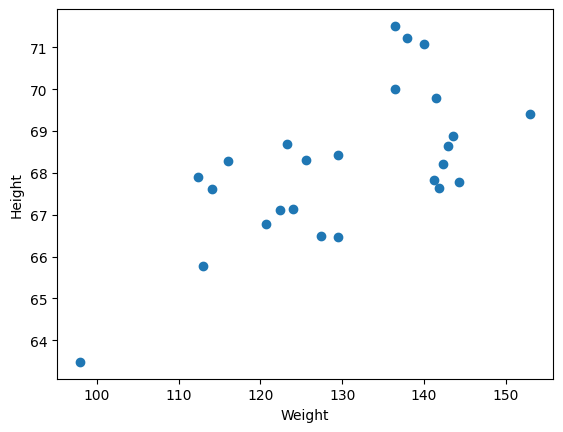

In [3]:
plt.scatter(df["Weight(Pounds)"], df["Height(Inches)"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [4]:
# divide dataset into dependent and independent features

X = df[["Weight(Pounds)"]]
y = df["Height(Inches)"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [6]:
# Standardize dataset

from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

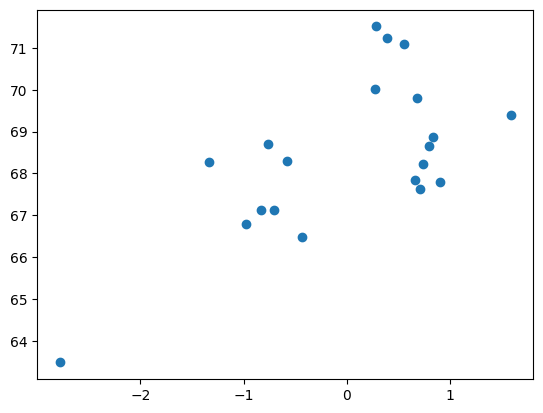

In [8]:
plt.scatter(X_train,y_train)
plt.show()

In [9]:
# train the simple linear regression model

from sklearn.linear_model import LinearRegression

In [10]:
linear = LinearRegression()

In [11]:
linear.fit(X_train, y_train)

LinearRegression()

In [12]:
# slope or coeff of weight
linear.coef_ 

array([1.1748196])

In [13]:
# intercept

linear.intercept_

68.41629449999999

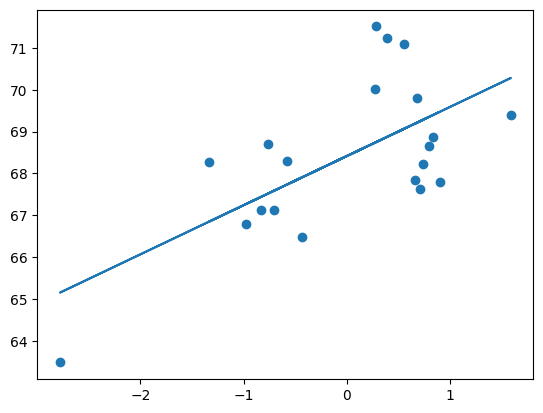

In [14]:
# best fit line

plt.scatter(X_train, y_train)
plt.plot(X_train, linear.predict(X_train))
plt.show()

In [15]:
y_pred_test = linear.predict(X_test)

In [16]:
y_pred_test, y_test

(array([66.49926138, 68.09442948, 66.55701522, 68.09446673, 66.66415129]),
 8     67.90265
 16    66.46100
 0     65.78331
 23    68.42187
 11    67.62333
 Name: Height(Inches), dtype: float64)

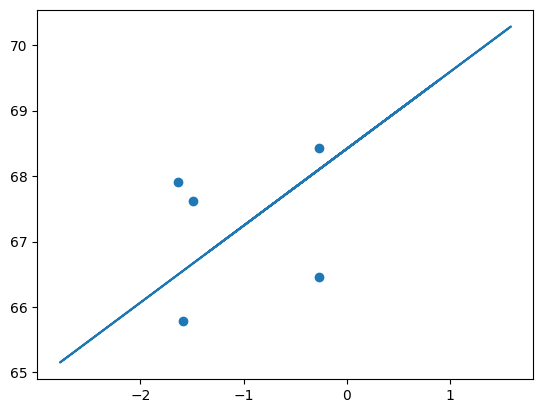

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_train,linear.predict(X_train))
plt.show()

In [23]:
# performance metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1.252685590180117
1.0194210601063447
1.1192343767862551


In [27]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred_test)
score

-0.32935252159532524

In [32]:
# predicting a new point

weight = scaler.transform([[80]])
weight

C:\Users\jaint\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-4.19773745]])

In [34]:

print(linear.predict([weight[0]]))

[63.48471028]


In [40]:
# residuals

residuals = y_test - y_pred_test
residuals

8     1.403389
16   -1.633429
0    -0.773705
23    0.327403
11    0.959179
Name: Height(Inches), dtype: float64

C:\Users\jaint\AppData\Local\Temp\ipykernel_36072\270961135.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde = True)


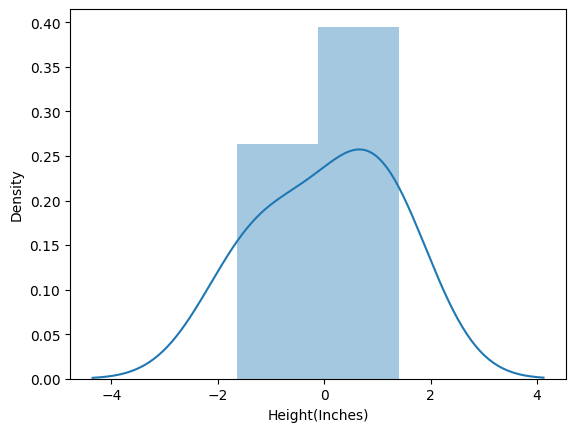

In [60]:
import seaborn as sns

sns.distplot(residuals, kde = True)
plt.show()